<a href="https://colab.research.google.com/github/feniltailor22/Deep_Learning/blob/main/Transfer_Learning_Plant_Diseases_identification_using_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#In the given dataset we have Tomato leaf image dataset having 10 categories.
#We have 10 types of tometo leaves.
#We have approx 1900 Images in each class of Training data and 500 Images in Testing data.
#Here we will identify the type of Tomato Plant Diseases with the help of available Training Tomato Leaf Images using VGG 16 Transfer Learning.   

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
#Steps to load a dataset from kaggle

In [4]:
#1. Install the Kaggle library

! pip install kaggle

In [5]:
#2. Make a directory named “.kaggle”

! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
#3. Copy the “kaggle.json” into this new directory

! cp kaggle.json ~/.kaggle/

In [7]:
#4. Allocate the required permission for this file.

! chmod 600 ~/.kaggle/kaggle.json

In [8]:
#Downloading Competitions dataset:
# Copy API Command 

! kaggle datasets download -d noulam/tomato

100% 742M/743M [00:15<00:00, 37.3MB/s]
100% 743M/743M [00:15<00:00, 50.5MB/s]


In [9]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  tomato.zip
replace New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [10]:
Train_path= '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/'
Test_path= '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/'

In [11]:
# re-size all the images to 224*224 because VGG 16 has 224*224 input layer architecture
IMAGE_SIZE = [224, 224]

In [12]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#[3] in IMAGE_SIZE + [3] stands for image channels
#include_top= False means dropping the output layer of VGG 16.
#because VGG 16 has 1000 categories in output layer and we only classify data according to the requirement.

In [13]:
# don't train existing weights of VGG 16 because it is already trained weights.
for layer in vgg.layers:
  layer.trainable = False

In [14]:
#getting the number of classes available in Training Data
folders= glob('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/*')

In [15]:
folders

['/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/new plant diseases dataset

In [16]:
#Flattening the last layer of VGG 16
x = Flatten()(vgg.output)

In [17]:
#Creating the last output layer (which is dense) = len(folders) = 10 here.
predictions= Dense(len(folders), activation='softmax')(x)

In [18]:
#creating a model
model= Model(inputs=vgg.input, outputs=predictions)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [23]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [24]:
training_set= train_datagen.flow_from_directory(
    directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(224,224),
    batch_size=16,
    class_mode= 'categorical'
)

Found 18345 images belonging to 10 classes.


#flow_from_directory parameters 
directory: The path to the folder that contains all the images.  
x_col: The column name in the DataFrame that has the image names.  
y_col: The column name in the DataFrame that has the target values.  
class_mode: Set to binary is for 1-D binary labels whereas categorical is for 2-D one-hot encoded labels.  
target_size: Size of input images.  
batch_size: Size of the batches of data.  
seed: Set to reproduce the result.

In [25]:
testing_set= test_datagen.flow_from_directory(
    directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    target_size=(224,224),
    batch_size=16,
    class_mode= 'categorical'
)

Found 4585 images belonging to 10 classes.


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
earlystop= EarlyStopping(monitor='val_loss', patience=5)

In [29]:
#fit the model
results= model.fit(
    x=training_set, 
    validation_data=testing_set, 
    batch_size=16,
    epochs=10,
    verbose=True,
    callbacks=earlystop,
    shuffle=True
    )

Epoch 1/10
1147/1147 [==============================] - 344s 270ms/step - loss: 0.8029 - accuracy: 0.7471 - val_loss: 0.9486 - val_accuracy: 0.7370
Epoch 2/10
1147/1147 [==============================] - 306s 267ms/step - loss: 0.5169 - accuracy: 0.8461 - val_loss: 0.3538 - val_accuracy: 0.8883
Epoch 3/10
1147/1147 [==============================] - 305s 266ms/step - loss: 0.4538 - accuracy: 0.8678 - val_loss: 0.6134 - val_accuracy: 0.8406
Epoch 4/10
1147/1147 [==============================] - 307s 268ms/step - loss: 0.3867 - accuracy: 0.8878 - val_loss: 0.3621 - val_accuracy: 0.9016
Epoch 5/10
1147/1147 [==============================] - 312s 272ms/step - loss: 0.3714 - accuracy: 0.8969 - val_loss: 0.4759 - val_accuracy: 0.8827
Epoch 6/10
1147/1147 [==============================] - 308s 269ms/step - loss: 0.3598 - accuracy: 0.9007 - val_loss: 0.5405 - val_accuracy: 0.8794
Epoch 7/10
1147/1147 [==============================] - 309s 269ms/step - loss: 0.2955 - accuracy: 0.9185 - val_

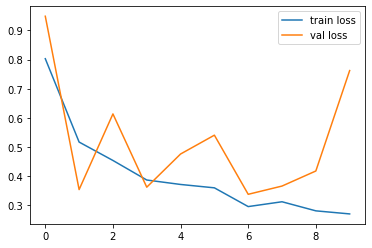

In [31]:
# loss
plt.plot(results.history['loss'], label='train loss')
plt.plot(results.history['val_loss'], label='val loss')
plt.legend()
plt.show()

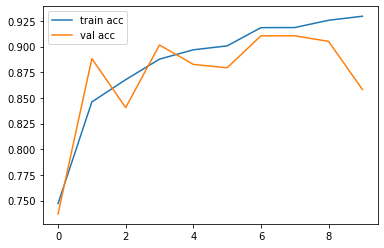

In [33]:
# accuracies
plt.plot(results.history['accuracy'], label='train acc')
plt.plot(results.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()